In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time

In [65]:
import importlib
import os.path

### Construct a data frame containing all training data sequences and combine with target probability distribution into one dataframe

In [66]:
root = 'data/train'
file_paths = os.listdir(root)
rel_file_paths = [os.path.join(root, x) for x in file_paths]

In [67]:
rel_file_paths[1]

'data/train\\00001'

In [68]:
training_sequences = []

for i in range(1,len(rel_file_paths)):
    sequence = pd.read_csv(rel_file_paths[i]+'/columns_1000ms.csv')
    sequence_targets =  pd.read_csv(rel_file_paths[i]+'/targets.csv')
    
    if sequence.shape[0] == sequence_targets.shape[0]:
        sequence_complete = pd.concat([sequence , sequence_targets] , axis = 1)
        sequence_final = sequence_complete.dropna(subset=sequence_targets.columns) 
        deleted = ((sequence_complete.shape[0] - sequence_final.shape[0]) / sequence_complete.shape[0])*100
        print('sequence ' + str(rel_file_paths[i][-2:]) + ', ' + str(int(deleted)) + '% of rows deleted')
        training_sequences.append(sequence_final)
        
    else:
        print('Number of rows for sequence data and target do not match for sequence ' + str(rel_file_paths[i][-2:]))

sequence 01, 4% of rows deleted
sequence 02, 2% of rows deleted
sequence 03, 5% of rows deleted
sequence 04, 2% of rows deleted
sequence 05, 3% of rows deleted
sequence 06, 3% of rows deleted
sequence 07, 1% of rows deleted
sequence 08, 4% of rows deleted
sequence 09, 1% of rows deleted
sequence 10, 1% of rows deleted


In [70]:
training_data_full = pd.concat(training_sequences)
training_data_full

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### Count the number of NANs per column

In [144]:
training_data_trimmed = training_data_full.copy()

In [145]:
na_vals_per_column = []
for col in training_data_full.columns[:366]:
    n = training_data_full[col].isna().sum()
    na_vals_per_column.append(n)

    if n > (len(training_data_full) / 2):
        #print(col)
        training_data_trimmed.drop(col , axis=1 , inplace=True)
        

Text(10.049999999999997, 0.5, 'Frequency')

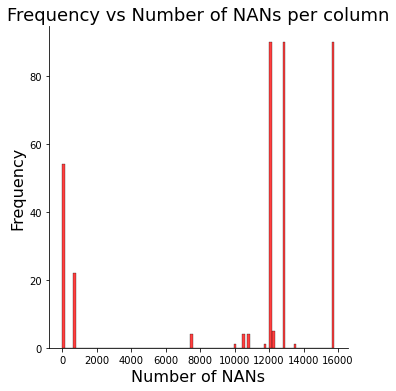

In [146]:
sns.displot(na_vals_per_column, kde=False, color='red', bins=100)
plt.title('Frequency vs Number of NANs per column', fontsize=18)
plt.xlabel('Number of NANs', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [147]:
training_data_trimmed.head()

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50


### Impute the missing values with their mean for now

In [100]:
for col in training_data_trimmed.columns:
    training_data_trimmed[col].fillna(training_data_trimmed[col].mean(), inplace = True) 

In [110]:
for col in training_data_trimmed.columns:
    if training_data_trimmed[col].isna().sum() > 0: 
        print('you have some nans left in the dataset mate')
        print(col)
    else: 
        pass
print('No nans remaining in the dataset')

No nans remaining in the dataset


In [151]:
#Drop the start and end columns 
try:
    training_data_trimmed.drop(['start' , 'end'] , axis=1 , inplace=True)
except KeyError:
    print('already removed')

already removed


### Assess level of agreement for the annotators

In [158]:
targets = training_data_trimmed[target_cols].copy()
targets['max'] = targets.max(axis = 1)

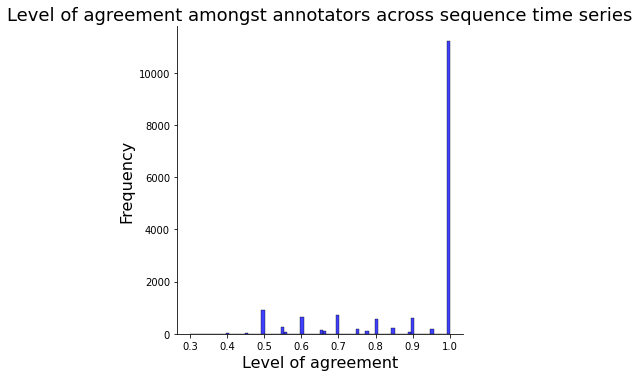

In [194]:
ax = sns.displot(targets['max'], kde=False, color='blue')
plt.title('Level of agreement amongst annotators across sequence time series', fontsize=18)
plt.xlabel('Level of agreement', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams['figure.figsize']=(30,30)


"for p in ax.patches:\n    height = p.get_height() # get the height of each bar\n    ax.text(x = p.get_x()+(p.get_width()/2), y = height+0.2 , s = '{:.0f}'.format(height) , ha = 'center')"

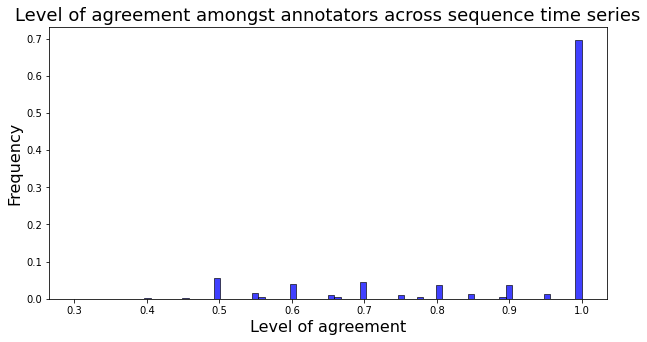

In [203]:
ax = sns.histplot(targets['max'], kde=False, color='blue', stat="probability" )
plt.title('Level of agreement amongst annotators across sequence time series', fontsize=18)
plt.xlabel('Level of agreement', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams['figure.figsize']=(10,4)

'''for p in ax.patches:
    height = p.get_height() # get the height of each bar
    ax.text(x = p.get_x()+(p.get_width()/2), y = height+0.2 , s = '{:.0f}'.format(height) , ha = 'center')'''

    

In [ ]:

# label each bar in histogram
for p in ax.patches:
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2) # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height) # data label, formatted to ignore decimals
    #ha = 'center' # sets horizontal alignment (ha) to center

In [ ]:
#Trying to generate a table to show percentage of datapoints with different max 

In [210]:
max_target_val = targets['max']

In [208]:
#Table values to be in range from 0.4 to 1
label_confidence = [i/100 for i in range(40,105,5)]

In [213]:
percentage_of_datapoints = []

for i in label_confidence:
    count = 0 
    for j in max_target_val: 
        if j >= i:
            count += 1 
    percentage_of_datapoints.append((count*100)/len(max_target_val))

In [218]:
label_confidence_df = pd.DataFrame(list(zip(label_confidence, percentage_of_datapoints)), columns =['label_confidence', 'percentage_of_datapoints'])

In [219]:
label_confidence_df

,label_confidence,percentage_of_datapoints
0,0.40,99.925484
1,0.45,99.714357
2,0.50,99.484600
3,0.55,93.833830
4,0.60,91.610780
5,0.65,87.586935
6,0.70,86.140089
7,0.75,81.718828
8,0.80,80.079483
9,0.85,76.440636


### Implement a baseline algorithm

In [132]:
target_cols = training_data_trimmed.columns[-20:]
feature_cols = training_data_trimmed.columns[:80]

In [140]:
train_x = training_data_trimmed[feature_cols].values
train_y = training_data_trimmed[target_cols].values

80